## Set Up

In this section, we import necessary python packages to run our code.

Additionally, we use Kaggle Hub to import our arabic sign language dataset.

To succesfully import the data you will need to:


*   Navigate to kaggle.com
*   Click on your profile picture in the right hand side. You will need an account for this.
* Select Settings from the drop down menu, and scroll down until you see "API".
* Create a New Token (figure below). A JSON file will be created.
* When COLAB prompts you to add your kaggle creditials, add the credientals given in the json created above.  

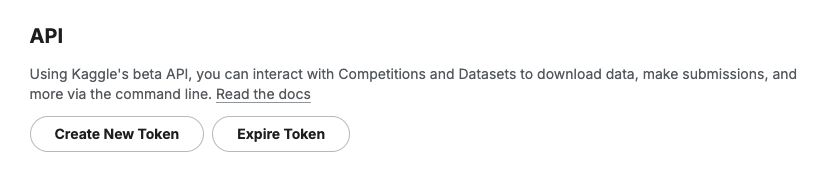



In [87]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler



## Import and Inspect the Data

Import the data set.

Check how the data was imported. It is 1 CSV.

Get the mean, count, and percentiles for each feature.

In [88]:
df = pd.read_csv("spotify_dataset.csv")

# get initial information
#print(df.head())
print(df.describe())

          Unnamed: 0     popularity   duration_ms   danceability  \
count  114000.000000  114000.000000  1.140000e+05  114000.000000   
mean    56999.500000      33.238535  2.280292e+05       0.566800   
std     32909.109681      22.305078  1.072977e+05       0.173542   
min         0.000000       0.000000  0.000000e+00       0.000000   
25%     28499.750000      17.000000  1.740660e+05       0.456000   
50%     56999.500000      35.000000  2.129060e+05       0.580000   
75%     85499.250000      50.000000  2.615060e+05       0.695000   
max    113999.000000     100.000000  5.237295e+06       0.985000   

              energy            key       loudness           mode  \
count  114000.000000  114000.000000  114000.000000  114000.000000   
mean        0.641383       5.309140      -8.258960       0.637553   
std         0.251529       3.559987       5.029337       0.480709   
min         0.000000       0.000000     -49.531000       0.000000   
25%         0.472000       2.000000     -1

In [89]:
print("Row count: ", df.shape[0])
print("Col count: ", df.shape[1])
print("Col names ", df.columns.tolist())
column_types = df.dtypes
print("Column Types" , column_types)

Row count:  114000
Col count:  21
Col names  ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
Column Types Unnamed: 0            int64
track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object


In [90]:
unique_values = df['track_genre'].unique()
value_counts = df['track_genre'].value_counts()
print("Unique Tracks per genre ", value_counts)

Unique Tracks per genre  track_genre
acoustic             1000
punk-rock            1000
progressive-house    1000
power-pop            1000
pop                  1000
                     ... 
folk                 1000
emo                  1000
electronic           1000
electro              1000
world-music          1000
Name: count, Length: 114, dtype: int64


## Handle Missing Data

Looking at all of the columns in the code, there is not a concering amount of missing data in each column, with 0-1 missing values per column.

In [91]:
df.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

##Explore Data Characteristics

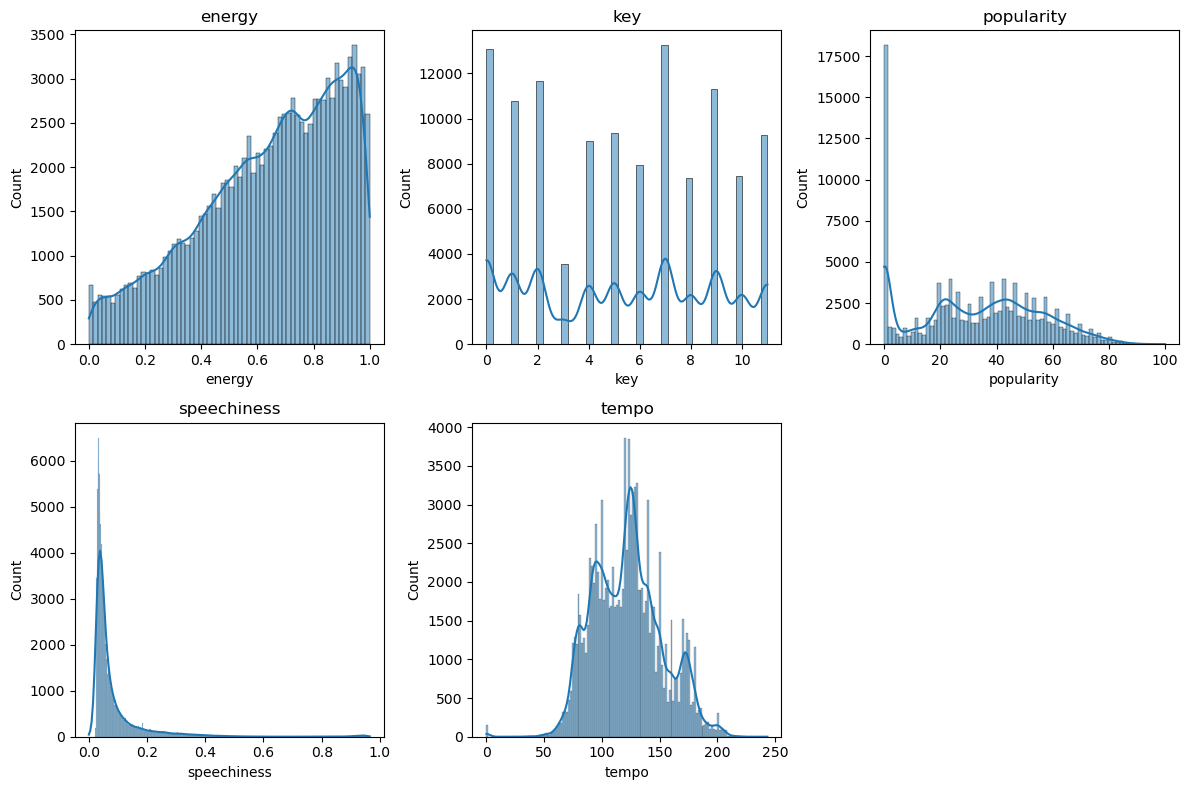


mean:
energy           0.641383
key              5.309140
popularity      33.238535
speechiness      0.084652
tempo          122.147837
dtype: float64 , 
median:
energy           0.6850
key              5.0000
popularity      35.0000
speechiness      0.0489
tempo          122.0170
dtype: float64 , 
std:
 energy          0.251529
key             3.559987
popularity     22.305078
speechiness     0.105732
tempo          29.978197
dtype: float64


In [92]:
features_to_plot = ['energy', 'key', 'popularity', 'speechiness', 'tempo']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df[features_to_plot].mean() , df[features_to_plot].median(), df[features_to_plot].std()))

The data is skewed to the right for speechiness, as the median is less than the mean. The data is skewed left for energy and popularity, as the mean is less than median. The data is normally distrubted for tempo.

## Perform Data Transformation

Transforming the data using min-max to ensure that the data scales values to between 0 and 1.

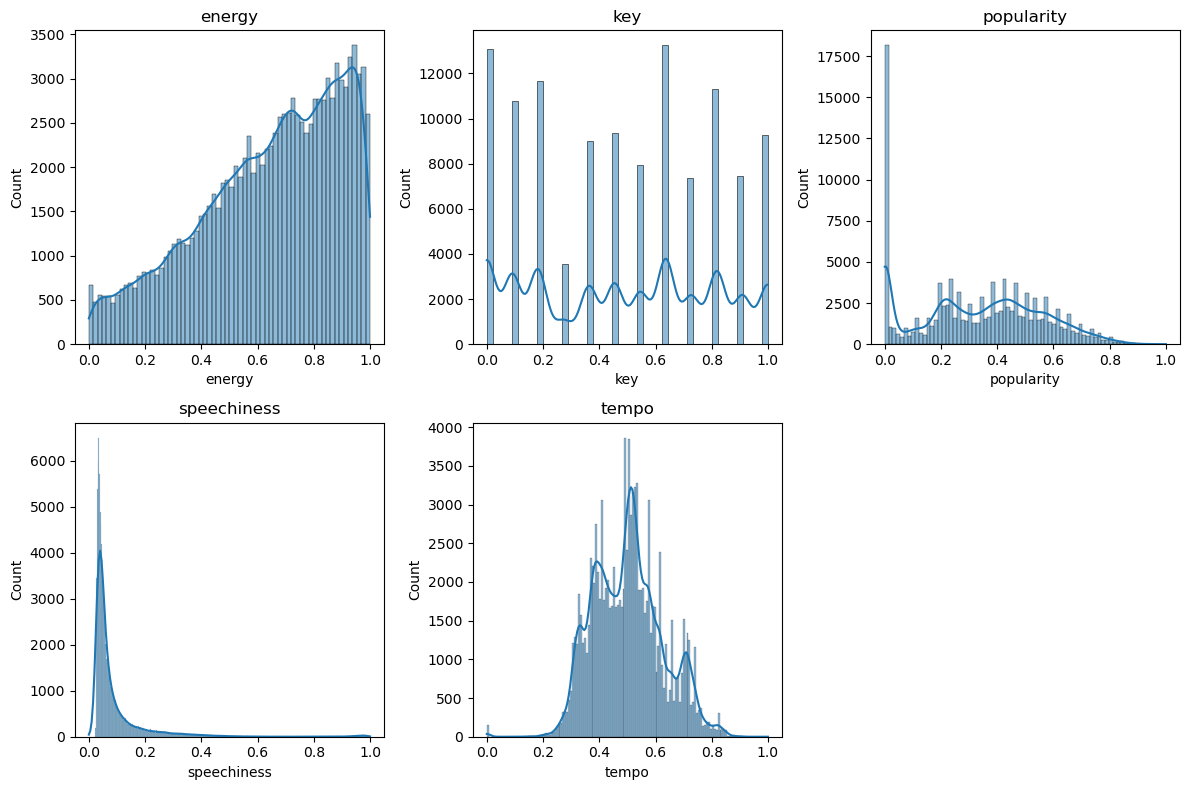


mean:
energy           0.641383
key              5.309140
popularity      33.238535
speechiness      0.084652
tempo          122.147837
dtype: float64 , 
median:
energy           0.6850
key              5.0000
popularity      35.0000
speechiness      0.0489
tempo          122.0170
dtype: float64 , 
std:
 energy          0.251529
key             3.559987
popularity     22.305078
speechiness     0.105732
tempo          29.978197
dtype: float64


In [93]:
mmscaler = MinMaxScaler()
features_to_scale = ['energy', 'key', 'popularity', 'speechiness', 'tempo']
mm_data = mmscaler.fit_transform(df[features_to_scale]) 
df_mm_data = pd.DataFrame(mm_data, columns=features_to_scale)
mm_data = mmscaler.fit_transform(df[features_to_scale])
df_mm_data = pd.DataFrame(mm_data, columns=features_to_scale)


features_to_plot = ['energy', 'key', 'popularity', 'speechiness', 'tempo']
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_mm_data[feature], kde=True)
    plt.title(feature)

plt.tight_layout()
plt.show()

print("\nmean:\n{} , \nmedian:\n{} , \nstd:\n {}".format(df[features_to_plot].mean() , df[features_to_plot].median(), df[features_to_plot].std()))

#Correlation Matrix

In [94]:
numbers_df = df.iloc[:,5:20]
numbers_df

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5
113996,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4
113997,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4
113998,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4


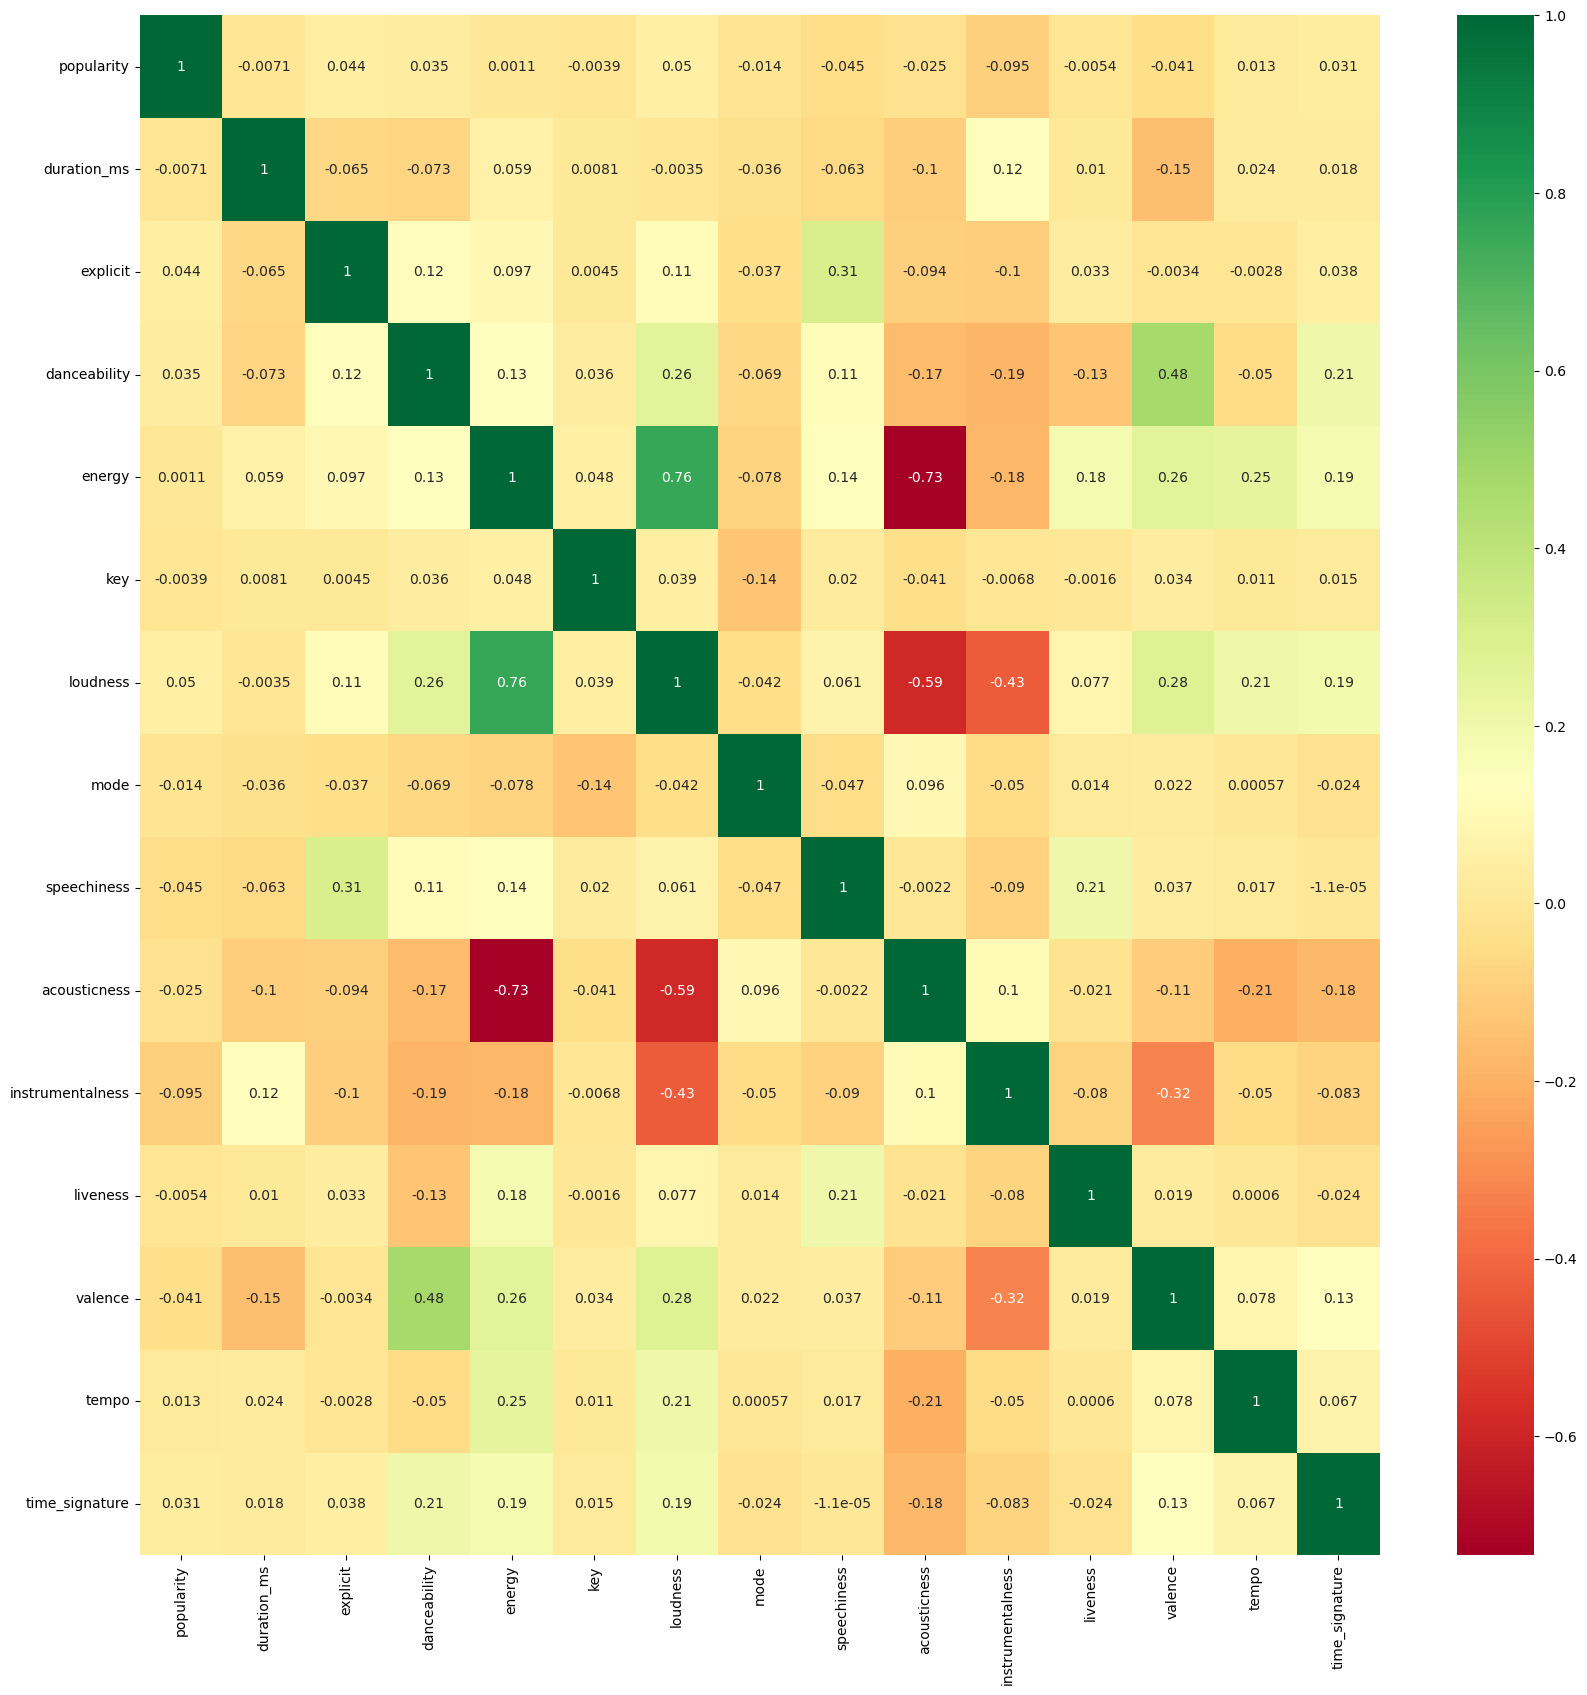

In [95]:
corrmat = numbers_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(numbers_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [96]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

base_cols = ['track_id', 'Unnamed: 0', 'track_genre', 'artists', 'album_name',
              'track_name', 'explicit', 'key', 'mode', 'liveness', 'time_signature']
df1 = df.drop(columns=base_cols)

onehot = OneHotEncoder(sparse_output=False)
genre_df = pd.DataFrame(onehot.fit_transform(df[['track_genre']]),
                        columns=onehot.categories_[0], index=df.index)
df2 = pd.concat([df1, genre_df], axis=1)

X = df2.drop('popularity', axis=1).values
y = df2['popularity'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler_x = MinMaxScaler(); X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled  = scaler_x.transform(X_test)
scaler_y = MinMaxScaler(); y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled  = scaler_y.transform(y_test)

In [97]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPRegressor


base_model = MLPRegressor(
    max_iter=200,
    random_state=42
)
base_model.out_activation_ = "logistic"


param_grid = {
    'hidden_layer_sizes':    [(128, 64), (256, 128), (128, 64, 32)],
    'activation':            ['relu', 'tanh'],   
    'solver':                ['adam'],     
    'alpha':                 [1e-5, 1e-4, 1e-3], 
    'learning_rate_init':    [0.001, 0.0005],  
    'learning_rate':         ['constant', 'adaptive'],
}

grid_search = RandomizedSearchCV(
    estimator=base_model,
    param_distributions=param_grid,
    n_iter = 30,
    scoring='neg_mean_squared_error',
    cv=6,
    n_jobs=-1,
    verbose=0,
    random_state=42
)
grid_result = grid_search.fit(X_train_scaled, y_train_scaled)

print("Best hyper‐parameters:", grid_search.best_params_)
print("Best CV MSE:         ", -grid_search.best_score_)


/Users/ruhiaggarwal/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ruhiaggarwal/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ruhiaggarwal/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1650: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/ruhiaggarwal/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilay

Best hyper‐parameters: {'solver': 'adam', 'learning_rate_init': 0.001, 'learning_rate': 'constant', 'hidden_layer_sizes': (256, 128), 'alpha': 0.001, 'activation': 'relu'}
Best CV MSE:          0.034420824026981135


In [102]:
best_model = grid_search.best_estimator_

y_pred_scaled = best_model.predict(X_test_scaled).reshape(-1, 1)

y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test_og = scaler_y.inverse_transform(y_test_scaled)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test_og, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_og, y_pred)
r2 = r2_score(y_test_og, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.2f}")


MAE:  13.15
RMSE: 18.44
R²:   0.31


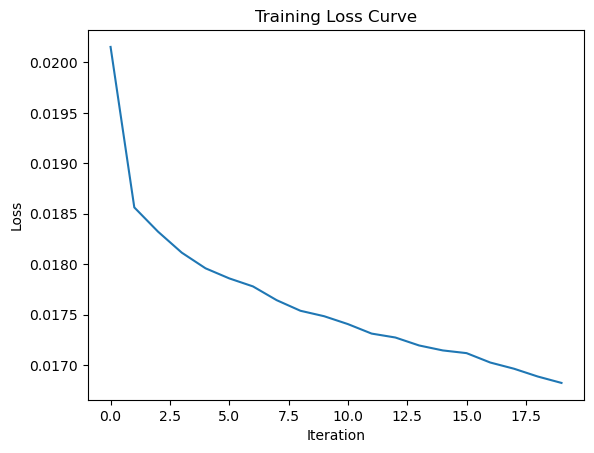

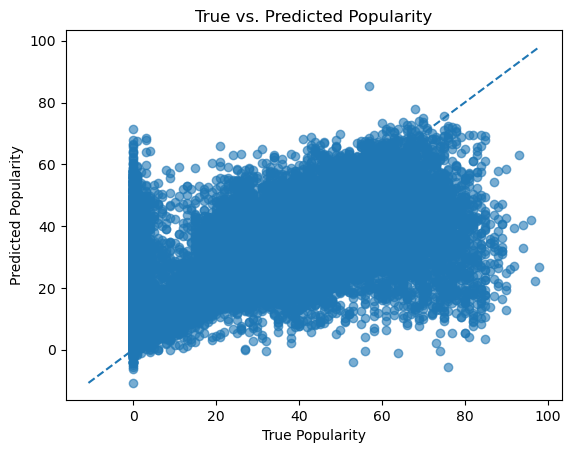

In [103]:
y_true = y_test_og.flatten()
y_predp = y_pred.flatten()

plt.figure()
plt.plot(best_model.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.show()

plt.figure()
plt.scatter(y_true, y_predp, alpha=0.6)
min_val = min(y_true.min(), y_predp.min())
max_val = max(y_true.max(), y_predp.max())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--')
plt.title('True vs. Predicted Popularity')
plt.xlabel('True Popularity')
plt.ylabel('Predicted Popularity')
plt.show()
